In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_excel(r"C:\Users\Rohit\Desktop\Machine Learning\SkinSegmentation.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B              245057 non-null int64
G              245057 non-null int64
R              245057 non-null int64
SKINNONSKIN    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [3]:
dataset.head()

,B,G,R,SKINNONSKIN
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


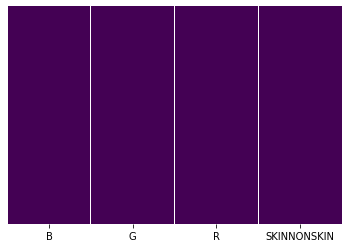

In [4]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="viridis")

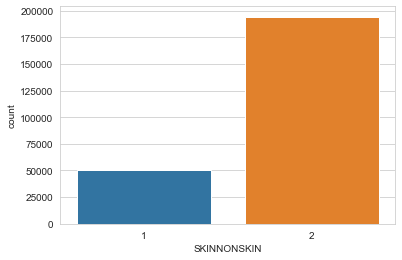

In [5]:
sns.set_style("whitegrid")
sns.countplot(x='SKINNONSKIN', data=dataset)

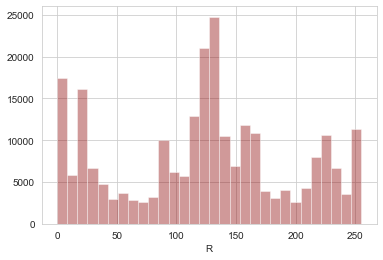

In [6]:
sns.distplot(dataset['R'].dropna(),kde=False,color='darkred',bins=30)

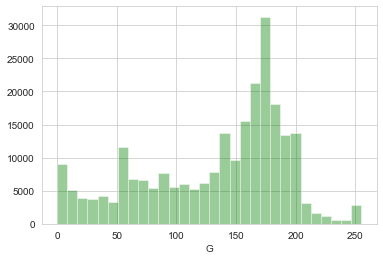

In [7]:
sns.distplot(dataset['G'].dropna(),kde=False,color='green',bins=30)

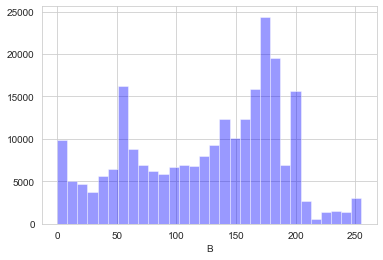

In [8]:
sns.distplot(dataset['B'].dropna(),kde=False,color='blue',bins=30)

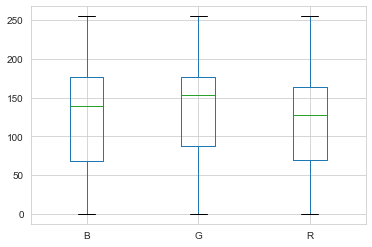

In [9]:
dataset.boxplot(column=['B','G','R'])

In [10]:
feature_coloumn= ["B","G","R"]
X = dataset[feature_coloumn]
y = dataset.SKINNONSKIN

In [11]:
print(X)

          B    G    R
0        74   85  123
1        73   84  122
2        72   83  121
3        70   81  119
4        70   81  119
...     ...  ...  ...
245052  163  162  112
245053  163  162  112
245054  163  162  112
245055  163  162  112
245056  255  255  255

[245057 rows x 3 columns]


In [12]:
print(y)

0         1
1         1
2         1
3         1
4         1
         ..
245052    2
245053    2
245054    2
245055    2
245056    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [13]:
import numpy as np
X,y = X[:245057],y[:245057]
shuffle_index = np.random.permutation(245057)
X,y = X.iloc[shuffle_index],y.iloc[shuffle_index]

In [14]:
print(X)

          B    G    R
127781  114  113   55
122597   35   35   21
219387   55   56   22
45136   119  161  226
54740   167  166  115
...     ...  ...  ...
132572  174  174  128
160038   93   88  150
166374  185  182  137
87181   164  162  114
176830  132  130   95

[245057 rows x 3 columns]


In [15]:
print(y)

127781    2
122597    2
219387    2
45136     1
54740     2
         ..
132572    2
160038    2
166374    2
87181     2
176830    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 0)

In [17]:
print("X_train Values:")
print(X_train)
print(X_train.shape)
print("---------------------")
print("y_train Values:")
print(y_train)
print(y_train.shape)

X_train Values:
          B    G    R
87866   111  112   56
192536  114  226  248
215115  173  171  123
4411     77   89  125
227863  185  182  137
...     ...  ...  ...
185362  234  218  212
32665   162  176  229
221214    2  130  101
128708  139  148   98
65177   165  162  111

[171539 rows x 3 columns]
(171539, 3)
---------------------
y_train Values:
87866     2
192536    2
215115    2
4411      1
227863    2
         ..
185362    2
32665     1
221214    2
128708    2
65177     2
Name: SKINNONSKIN, Length: 171539, dtype: int64
(171539,)


In [18]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = classifier1.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[12503  2770]
 [ 3263 54982]]
Classification report:
               precision    recall  f1-score   support

           1       0.79      0.82      0.81     15273
           2       0.95      0.94      0.95     58245

    accuracy                           0.92     73518
   macro avg       0.87      0.88      0.88     73518
weighted avg       0.92      0.92      0.92     73518



In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred))

Accuracy: 0.9179384640496205

MSE: 0.0820615359503795


In [23]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 91.89 %
Standard Deviation: 0.17 %


## XGBOOST Classifier

In [24]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15267     6]
 [   28 58217]]


In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %


## K-Nearest Neighbors


In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
y_pred1 = classifier2.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))
print("Classification report:\n",classification_report(y_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)

Confusion Matrix:
 [[15268     5]
 [   25 58220]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15273
           2       1.00      1.00      1.00     58245

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

Accuracy: 99.95919366685709


In [31]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

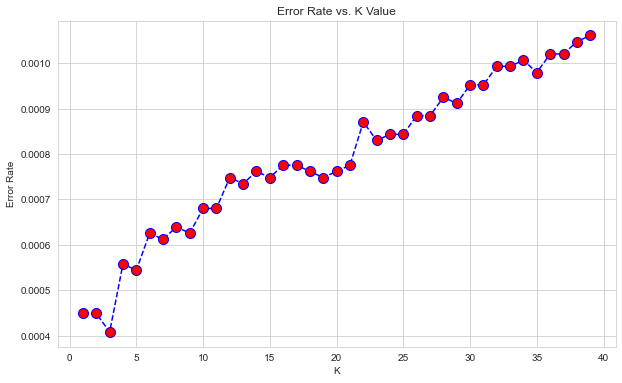

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =3 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
y_pred1 = classifier2.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))
print("Classification report:\n",classification_report(y_test, y_pred1))

Confusion Matrix:
 [[15268     5]
 [   25 58220]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15273
           2       1.00      1.00      1.00     58245

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred1))

Accuracy: 99.95919366685709

MSE: 0.00040806333142903776


In [37]:
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %


## Support Vector Machines(SVM)

In [38]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = classifier4.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15273     0]
 [  122 58123]]


In [41]:
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %
